In [2]:
import pandas as pd
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
import math
import yfinance as yf
import random
import csv

# Retrieving close data for each asset

[*********************100%***********************]  7 of 7 completed


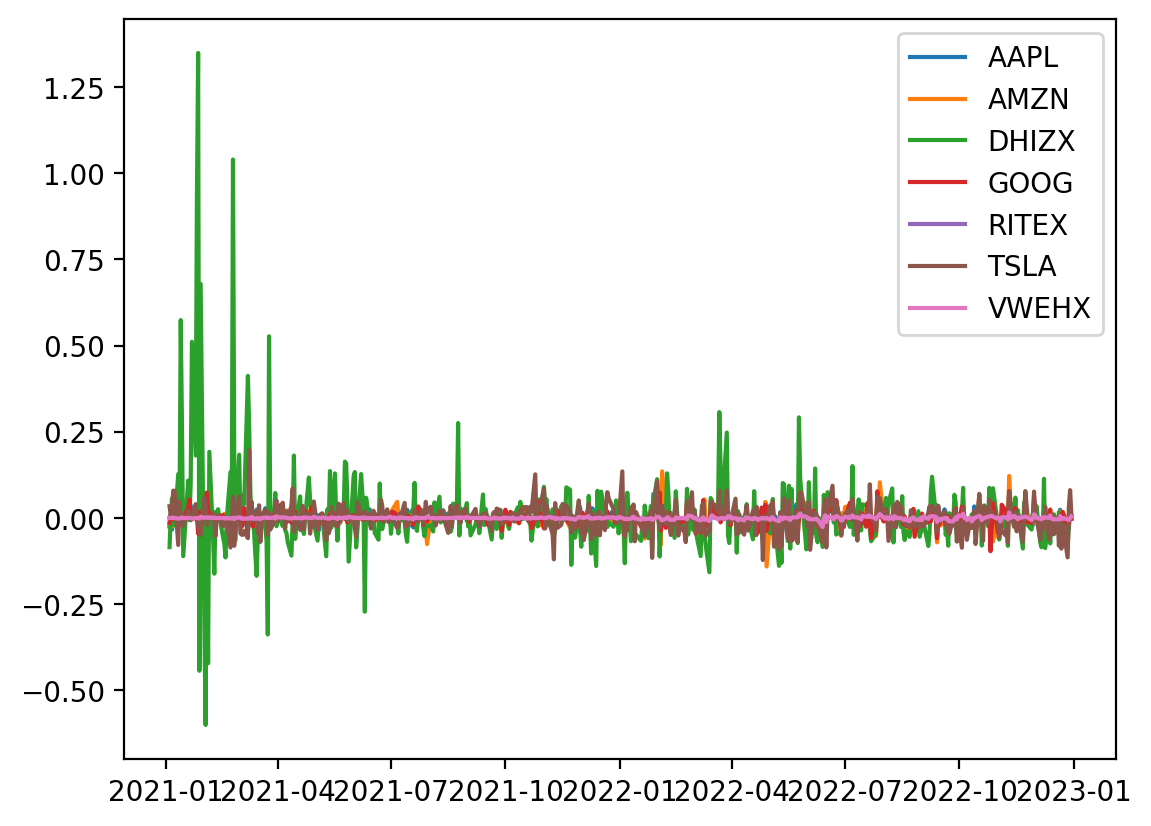

In [3]:
# to display matplotlib in high-resolution
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#creating dataframe getting all adjusted close data from each asset
assets = ["AAPL", "AMZN", "GOOG", "TSLA", "GME", "RITEX", "VWEHX"]
assets_data = yf.download(assets, "2020-12-31", "2022-12-31") ["Adj Close"]
rets = assets_data.pct_change()
assets_data.dropna(inplace=True) #to drop any NaN values
assets_dataframe = assets_data.head()


plt.plot(rets)
plt.legend(['AAPL', 'AMZN', 'DHIZX', 'GOOG', 'RITEX', 'TSLA', 'VWEHX'], loc=1, fontsize=10)


In [4]:
rets.head().dropna()

,AAPL,AMZN,GME,GOOG,RITEX,TSLA,VWEHX
Date,,,,,,,
2021-01-04,-0.024719,-0.021585,-0.084395,-0.013494,0.000000,0.034152,0.000000
2021-01-05,0.012364,0.010004,0.006957,0.007337,0.000986,0.007317,0.000000
2021-01-06,-0.033661,-0.024897,0.056995,-0.003234,0.000985,0.028390,0.000000
2021-01-07,0.034123,0.007577,-0.015251,0.029943,0.000984,0.079447,0.001672


In [5]:
def variance(assets):
    dataframe = yf.download(f"{assets}", "2020-12-31", "2022-12-31")["Adj Close"]
    returns = dataframe.pct_change()
    dataframe.dropna(inplace=True)
    variance = returns.var()
    return variance * 504



def get_mean(assets):
    dataframe = yf.download(f"{assets}", "2020-12-31", "2022-12-31")["Adj Close"]
    returns = dataframe.pct_change()
    dataframe.dropna(inplace=True)
    mean = returns.mean()
    return mean * 504


cov = rets.cov()
std = rets.std()


def volatility(assets):
    getData = yf.download(f"{assets}", "2020-12-31", "2022-12-31")["Adj Close"]
    getData_pctchange = getData.pct_change()
    getData_pctchange.dropna(inplace=True)
    vol = np.sqrt(variance(f"{assets}"))
    return vol


# correlation matrix

In [6]:
corr_mat = assets_dataframe.corr()

# Monte Carlo Simulation

In [7]:
num_port = 10000   #number of portfolio we want to generate
all_weights = []  #an empty list that will contain data for each portfolio

for i in range(num_port): #loop to iterate throught each portfolio
    weights = []
    for x in range(len(assets_data.columns)): # to generate weights for each assets in each portfolio
        weights.append(random.random())
    weights_sum = sum(weights)  
    norm_weights = [w/weights_sum for w in weights]  #using list comprehensions to divide each weight in the portfolio by the sum of the weights to ensure weights adds to 1
    all_weights.append(norm_weights)
    
portfolios_weight = pd.DataFrame(all_weights)
port_weight_data = portfolios_weight.rename(columns={ 0: 'AAPL', 1:'AMZN', 2:'GOOG', 3:'TSLA', 4:'GME', 5:'RITEX', 6:'VWEHX'})


# Efficient Frontier

In [8]:
portfolio_returns = [] #expected_returns for each portfolio
portfolio_vol = []  #volatility for each portfolio
rf = 1.03**(1/504)-1
port_rets_data= pd.DataFrame(portfolio_returns)
for i in range(num_port):
    port_weight = all_weights[i]
    port_rets = sum(port_weight * rets.mean())
    port_vol =  np.sqrt(np.dot(port_weight, np.dot(cov, port_weight)))
    portfolio_vol.append(port_vol)
    portfolio_returns.append(port_rets)

port_vol_data = pd.DataFrame(portfolio_vol)
port_rets_data = pd.DataFrame(portfolio_returns)
portw = pd.DataFrame(port_weight)

In [9]:
sharpe_ratio = [] #using for loop to iterate through the number of portfolios to calculate the sharpe ratio
for i in range(num_port):
    sharpe_ratio.append((portfolio_returns[i] - rf) / portfolio_vol[i])
sr_data = pd.DataFrame(sharpe_ratio)  

Text(0, 0.5, 'Expected Return')

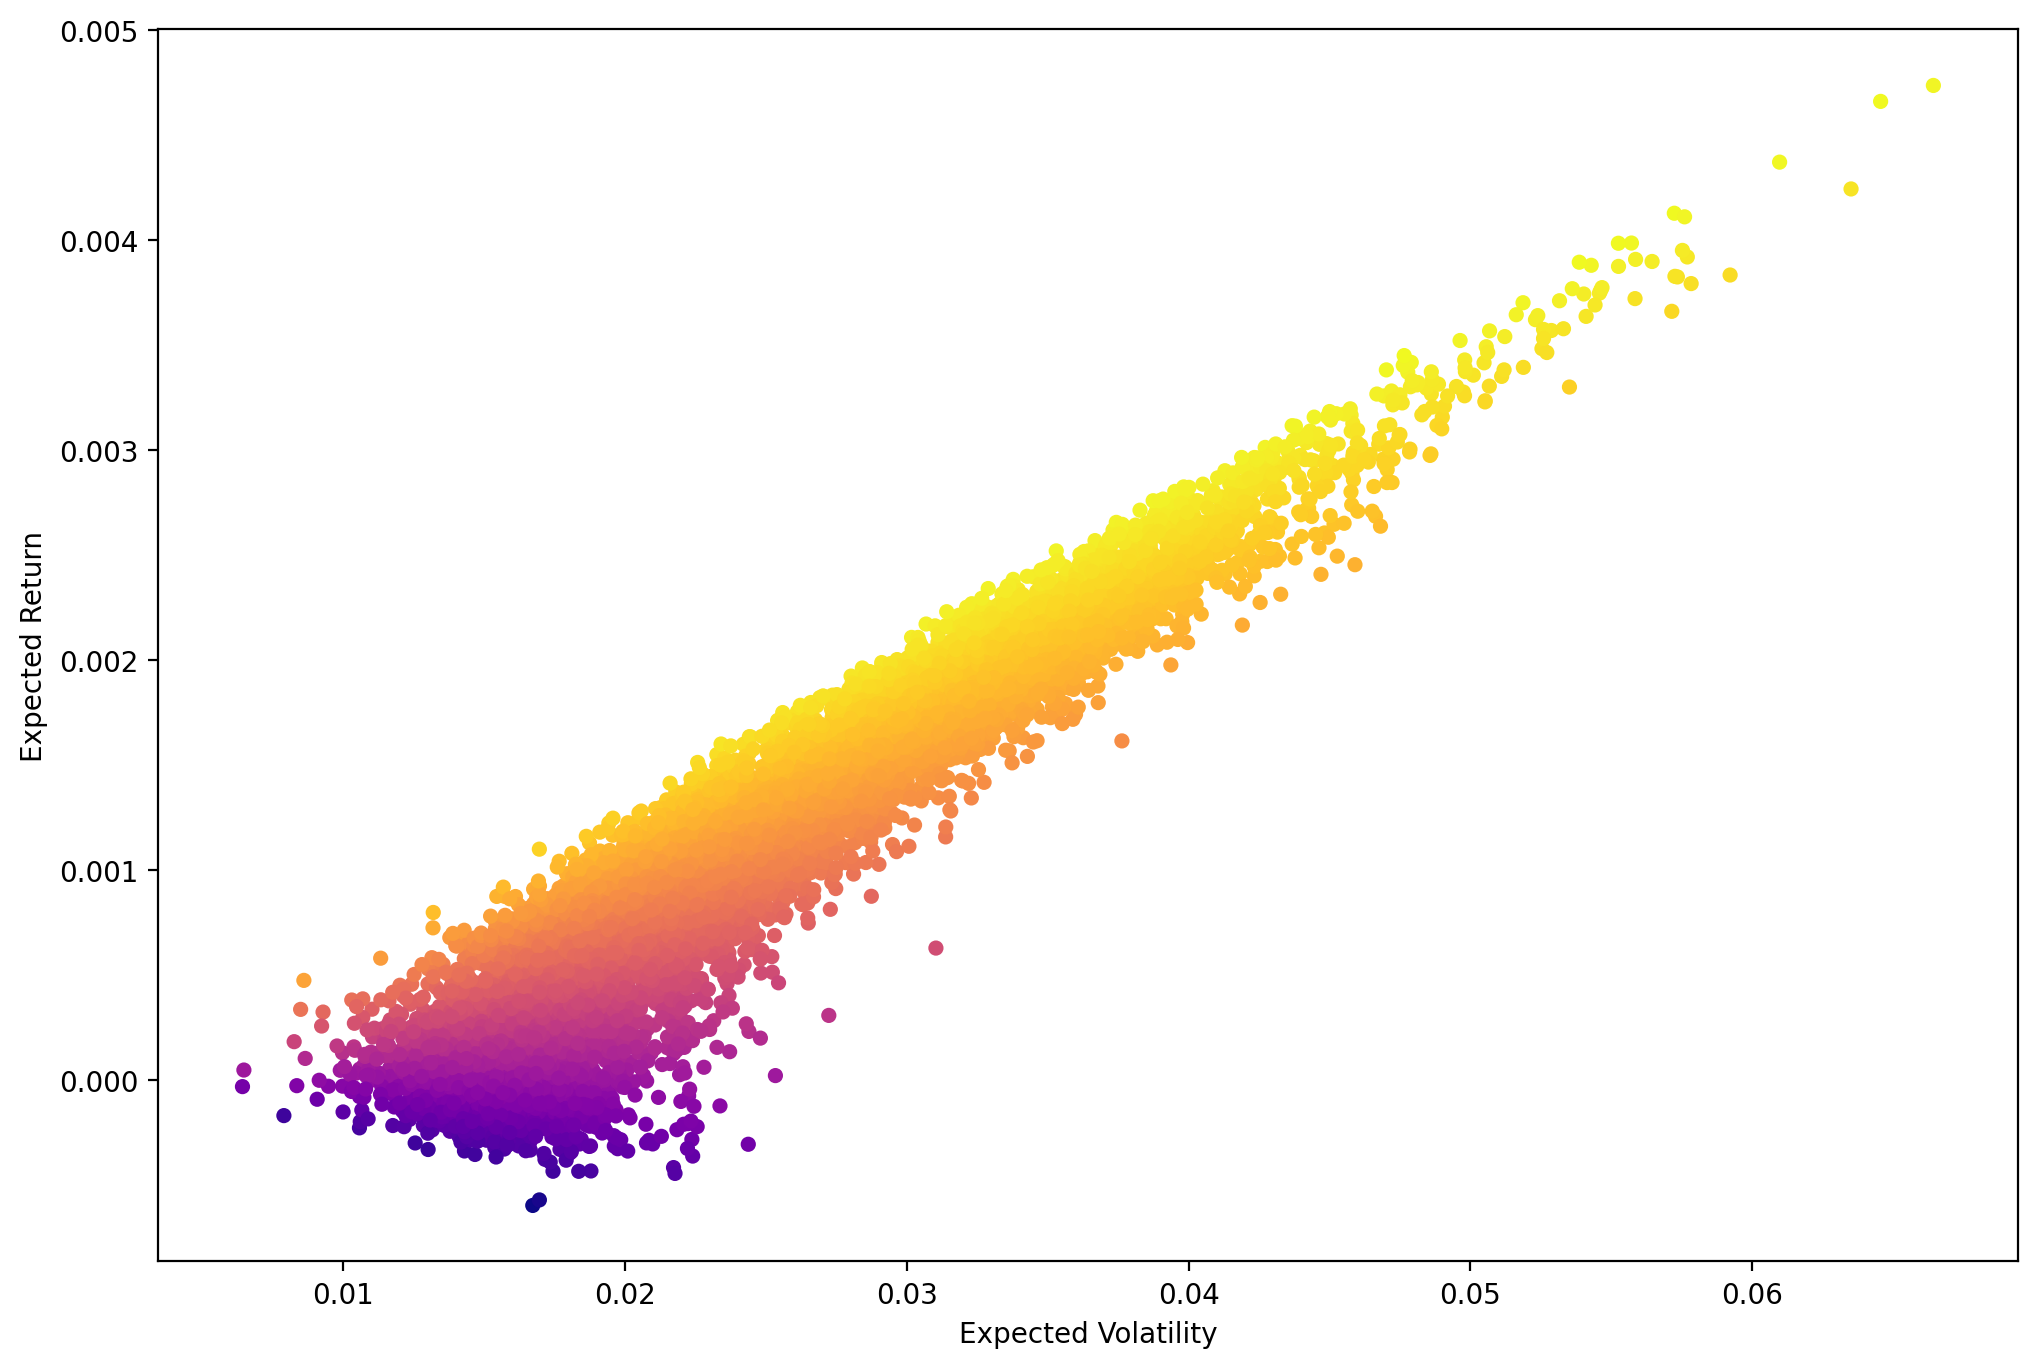

In [10]:
efficient_frontier = pd.DataFrame({'Return' : portfolio_returns, 'Volatility' : portfolio_vol})

efficient_frontier.plot(x='Volatility' , y='Return' , c=sharpe_ratio , kind='scatter' , figsize=(12,8) , cmap="plasma")
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

# Optimal Weights

In [11]:
highest_sr = np.array(sharpe_ratio).argmax()  #using argmax to identify the row (portfolio) of which the sharpe ratio was the highest
optimal_portfolio = np.array(all_weights)[highest_sr]
max_rets = portfolio_returns[highest_sr] #retrieving the expected return and volatility for the index that has the highest sharpe ratio
max_vol = portfolio_vol[highest_sr]
#Dataframe of the optimal weights
optimal_portfolio_df = pd.DataFrame({'Optimal Weight' : optimal_portfolio}, index=['AAPL', 'AMZN', 'GOOG', 'TSLA', 'GME', 'RITEX', 'VWEHX'])
optimal_portfolio_df

,Optimal Weight
AAPL,0.243314
AMZN,0.000238
GOOG,0.492459
TSLA,0.031377
GME,0.079092
RITEX,0.043869
VWEHX,0.109651


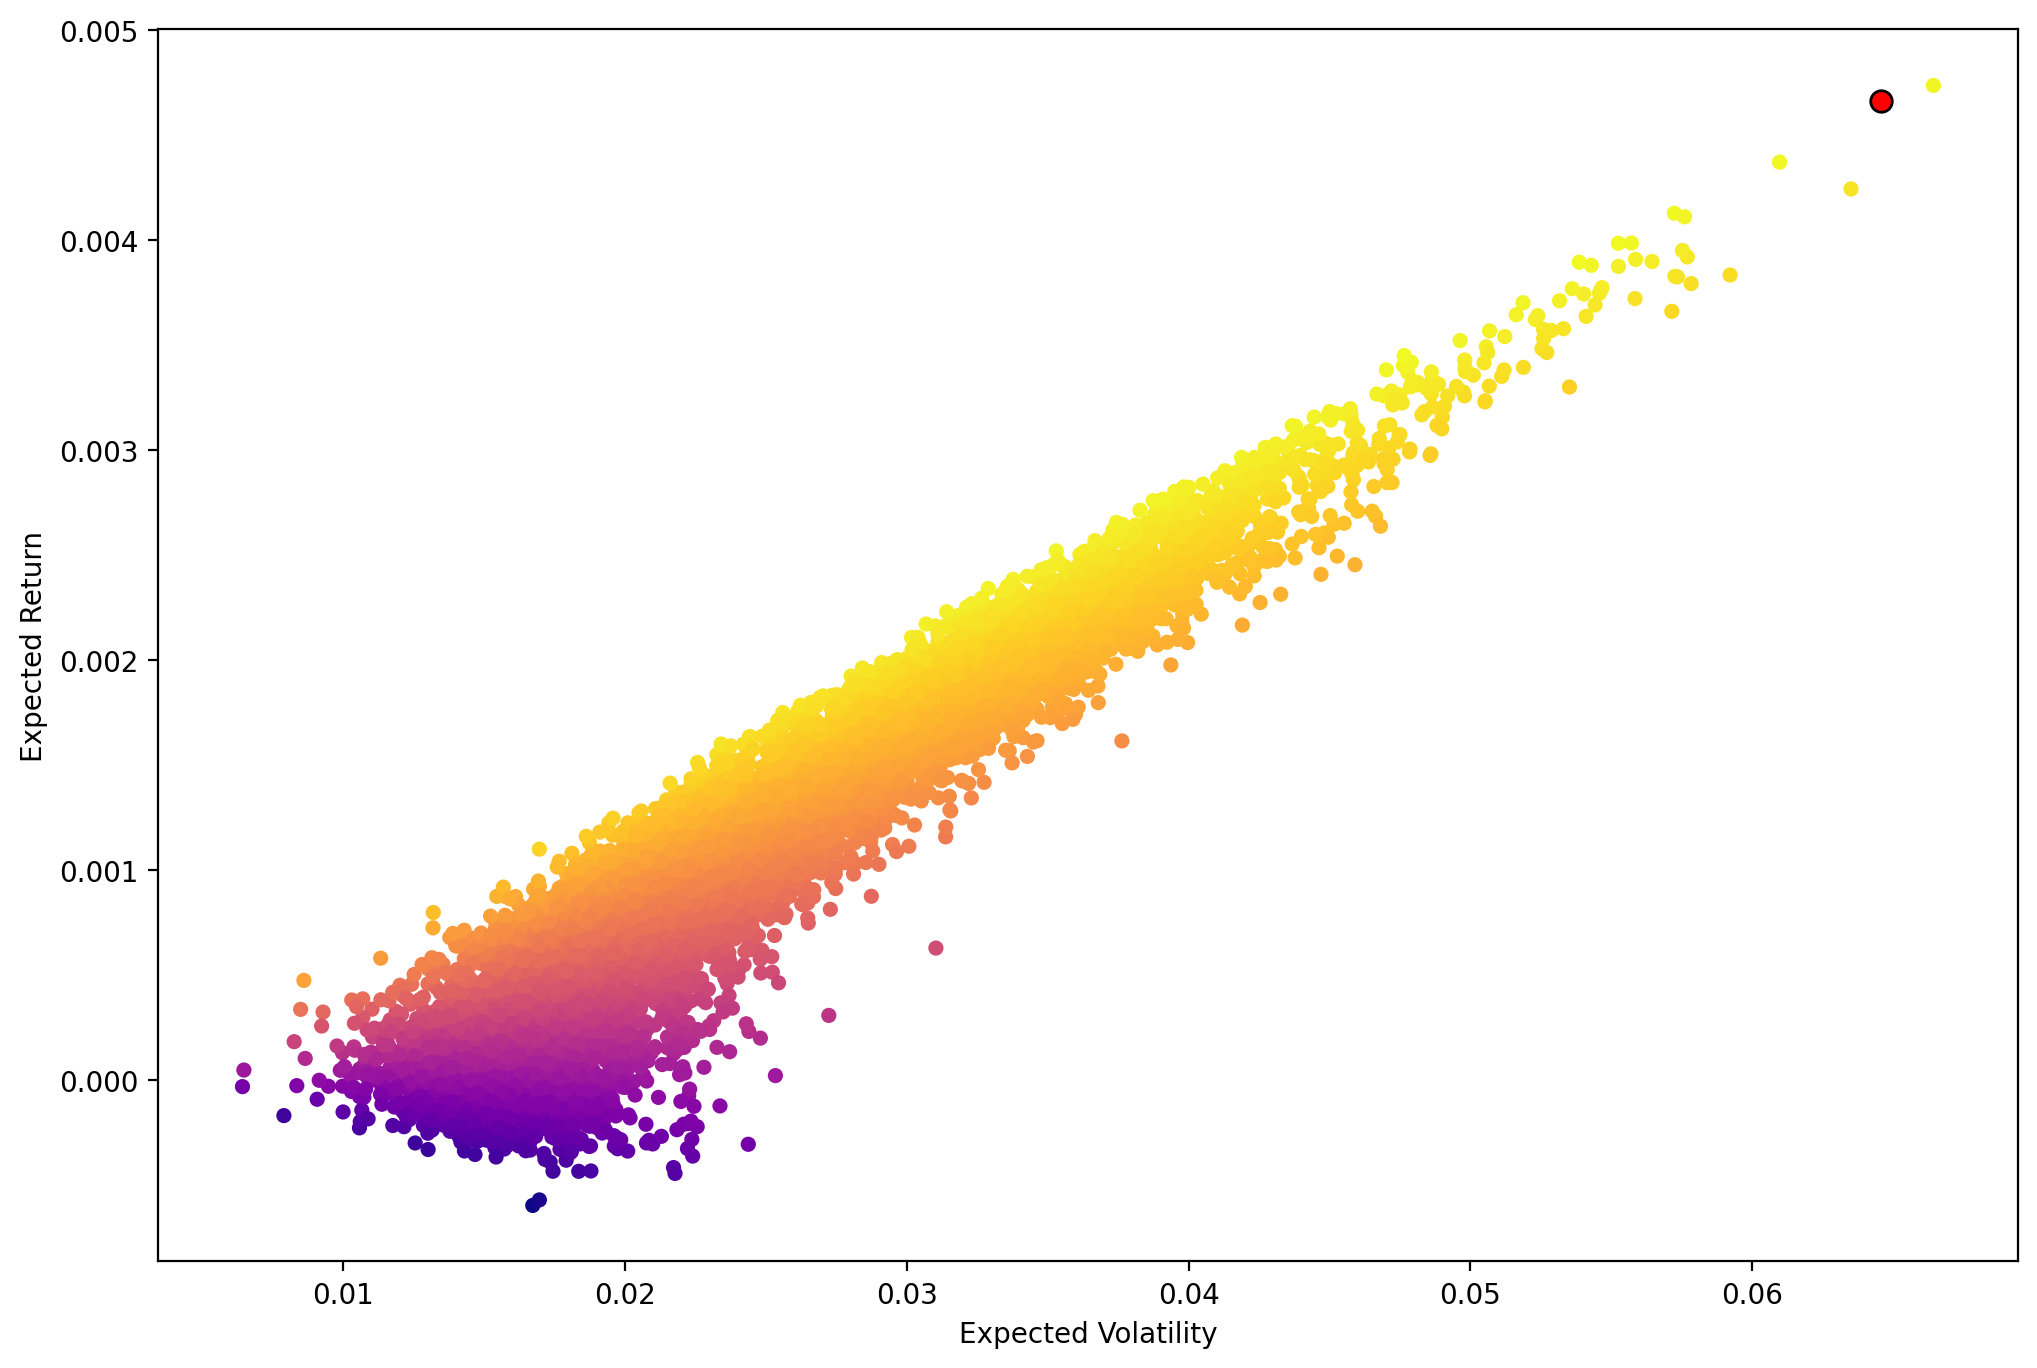

In [12]:
efficient_frontier = pd.DataFrame({'Return' : portfolio_returns, 'Volatility' : portfolio_vol})

ef_plot = efficient_frontier.plot(x='Volatility' , y='Return' , c=sharpe_ratio , kind='scatter' , figsize=(12,8) , cmap="plasma")
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

plt.scatter(max_vol , max_rets , c='red', s=60, edgecolor='black')
plt.savefig('EF plot.png')

In [15]:
corr_mat.style.background_gradient(cmap='coolwarm')

,AAPL,AMZN,GME,GOOG,RITEX,TSLA,VWEHX
AAPL,1.000000,0.841013,0.151231,0.441720,-0.317377,-0.211852,0.194037
AMZN,0.841013,1.000000,0.161589,-0.074136,-0.712380,-0.699035,-0.363693
GME,0.151231,0.161589,1.000000,0.340078,0.128679,-0.048152,0.083356
GOOG,0.441720,-0.074136,0.340078,1.000000,0.668691,0.735872,0.928020
RITEX,-0.317377,-0.712380,0.128679,0.668691,1.000000,0.936706,0.771721
TSLA,-0.211852,-0.699035,-0.048152,0.735872,0.936706,1.000000,0.903509
VWEHX,0.194037,-0.363693,0.083356,0.928020,0.771721,0.903509,1.000000
